In [ ]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("/content/enron_spam_data.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display data types and non-null counts
print("\nData types and non-null counts:")
display(df.info())

First 5 rows of the dataset:


,Unnamed: 0,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  33716 non-null  int64 
 1   Subject     33716 non-null  object
 2   Message     33664 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


None

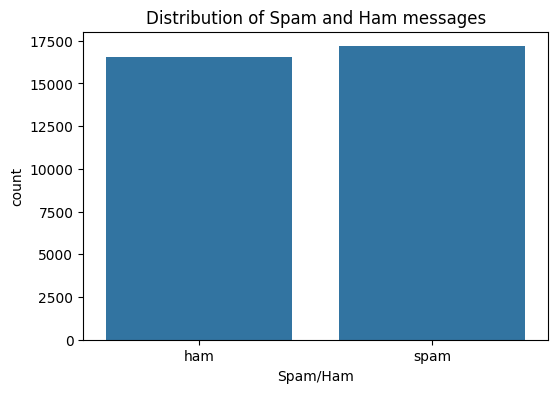

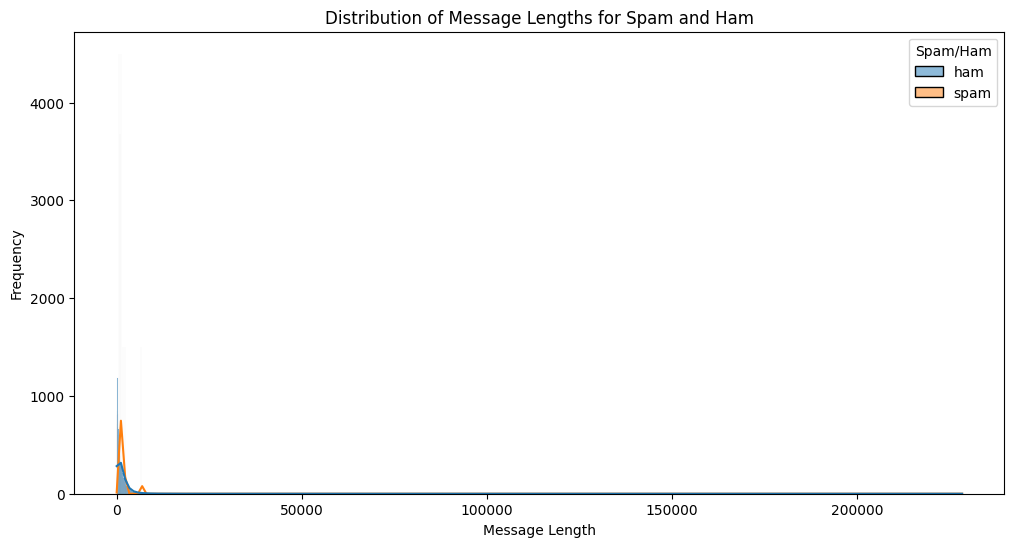

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of Spam/Ham
plt.figure(figsize=(6, 4))
sns.countplot(x='Spam/Ham', data=df)
plt.title('Distribution of Spam and Ham messages')
plt.show()

# Explore message length
df['message_length'] = df['Message'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='message_length', hue='Spam/Ham', kde=True)
plt.title('Distribution of Message Lengths for Spam and Ham')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print("\nAverage Message Lengths:")
print("Ham :", df[df['label']==0]['message_length'].mean())
print("Spam:", df[df['label']==1]['message_length'].mean())



Average Message Lengths:
Ham : 1681.574304250288
Spam: 1582.5638576669967


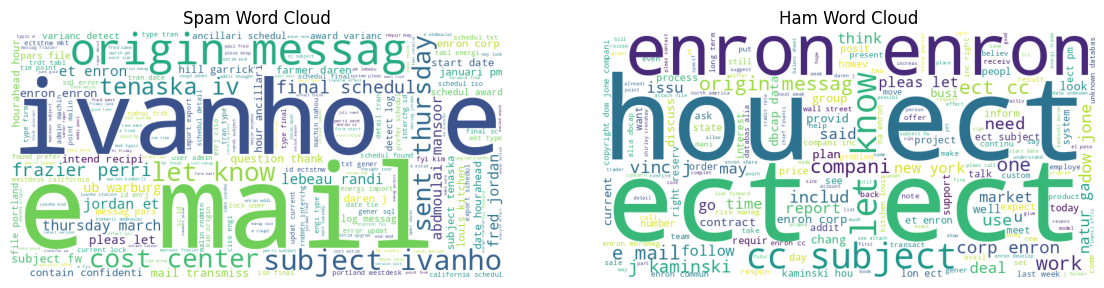

In [ ]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_text = " ".join(df[df['label']==1]['processed_text'])
ham_text  = " ".join(df[df['label']==0]['processed_text'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color="white").generate(spam_text))
plt.axis("off")
plt.title("Spam Word Cloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color="white").generate(ham_text))
plt.axis("off")
plt.title("Ham Word Cloud")
plt.show()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Handle missing values in 'Message' column by replacing NaN with an empty string
df['Message'] = df['Message'].fillna('')

# Function to clean text
def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    return text

df['cleaned_text'] = df['Message'].apply(clean_text)

# Tokenization, remove stop words and stemming
ps = PorterStemmer()
corpus = []

for message in df['cleaned_text']:
    words = nltk.word_tokenize(message)
    words = [ps.stem(word) for word in words if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(words))

df['processed_text'] = corpus

print("First 5 rows of the DataFrame with cleaned and processed text:")
display(df[['Message', 'cleaned_text', 'processed_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


First 5 rows of the DataFrame with cleaned and processed text:


,Message,cleaned_text,processed_text
0,,,
1,"gary , production from the high island larger ...",gary production from the high island larger b...,gari product high island larger block 1 2 comm...
2,- calpine daily gas nomination 1 . doc,calpine daily gas nomination 1 doc,calpin daili ga nomin 1 doc
3,fyi - see note below - already done .\nstella\...,fyi see note below already done \nstella\n ...,fyi see note alreadi done stella forward stell...
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,fyi \n forwarded by lauri...,fyi forward lauri allen hou ect 12 14 99 12 17...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spam/Ham labels to binary
df['label'] = df['Spam/Ham'].map({'ham': 0, 'spam': 1})

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

# Average TF-IDF per class
spam_tfidf = X[y==1].mean(axis=0)
ham_tfidf  = X[y==0].mean(axis=0)

# Top 20 spam words
top_spam_idx = np.argsort(spam_tfidf)[-20:]
top_ham_idx  = np.argsort(ham_tfidf)[-20:]

print("Top Spam Words:", feature_names[top_spam_idx])
print("Top Ham Words :", feature_names[top_ham_idx])


Top Spam Words: ['02' 'transfer' 'get' 'id' 'messag' 'tran' 'ub' 'point' 'subject'
 'jordan' 'enron' '2002' 'center' 'final' 'fred' 'type' 'cost' '07'
 'ivanho' 'schedul']
Top Ham Words : ['know' 'see' 'meet' 'subject' '12' 'attach' '00' '01' 'would' 'deal'
 '2001' 'com' 'thank' 'pleas' '2000' 'vinc' 'schedul' 'hou' 'enron' 'ect']


In [ ]:
# Check class distribution in train and test sets
import collections

print("\nClass Distribution:")
print("Train set:", collections.Counter(y_train))
print("Test set :", collections.Counter(y_test))



Class Distribution:
Train set: Counter({np.int64(1): 13736, np.int64(0): 13236})
Test set : Counter({np.int64(1): 3435, np.int64(0): 3309})


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print dataset sizes
print(f"Total samples     : {len(X)}")
print(f"Training samples  : {len(X_train)}")
print(f"Testing samples   : {len(X_test)}")


Total samples     : 33716
Training samples  : 26972
Testing samples   : 6744


In [ ]:
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.likelihoods = {}
        self.vocab = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.vocab = np.arange(n_features)

        # class priors
        classes, counts = np.unique(y, return_counts=True)
        self.class_priors = {c: counts[i]/n_samples for i, c in enumerate(classes)}

        # likelihoods (with Laplace smoothing)
        self.likelihoods = {}
        for c in classes:
            X_c = X[y == c]
            word_count = X_c.sum(axis=0) + 1  # Laplace
            self.likelihoods[c] = word_count / word_count.sum()

    def predict_proba(self, X):
        probs = []
        for x in X:
            class_probs = {}
            for c in self.class_priors:
                log_prob = np.log(self.class_priors[c])
                log_prob += (x * np.log(self.likelihoods[c])).sum()
                class_probs[c] = log_prob
            # normalize using log-sum-exp trick
            max_log = max(class_probs.values())
            exp_probs = {c: np.exp(v - max_log) for c, v in class_probs.items()}
            total = sum(exp_probs.values())
            probs.append([exp_probs[c]/total for c in sorted(class_probs)])
        return np.array(probs)  # shape (n_samples, 2)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))


In [ ]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, reg_lambda=0.0):
        """
        lr         : learning rate
        epochs     : number of iterations
        reg_lambda : L2 regularization strength (default = 0, no regularization)
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.weights = None
        self.bias = 0
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients with L2 penalty
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) + self.reg_lambda * self.weights
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Track loss (binary cross-entropy + L2 penalty)
            loss = - (1/n_samples) * np.sum(y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9))
            loss += (self.reg_lambda/2) * np.sum(self.weights**2)
            self.losses.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        prob1 = self.sigmoid(linear_model)
        prob0 = 1 - prob1
        return np.vstack((prob0, prob1)).T  # shape (n_samples, 2)

    def predict(self, X):
        return np.where(self.predict_proba(X)[:,1] >= 0.5, 1, 0)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

    def plot_loss(self):
        """Plot training loss over epochs"""
        import matplotlib.pyplot as plt
        plt.plot(self.losses)
        plt.title("Logistic Regression Training Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()




Naive Bayes Results:
Accuracy : 0.9816132858837485
Precision: 0.9651587524585558
Recall   : 1.0
F1 Score : 0.9822705175865027


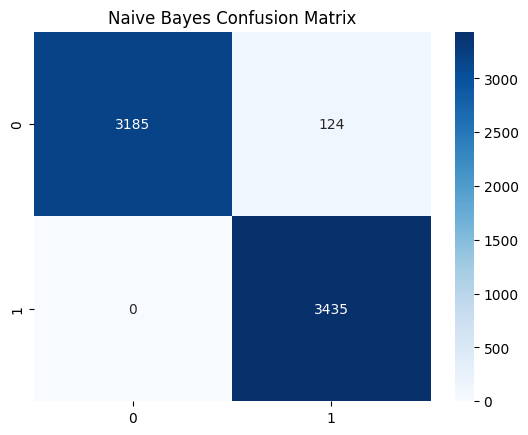


Logistic Regression Results:
Accuracy : 0.9836892052194544
Precision: 0.9689703808180536
Recall   : 1.0
F1 Score : 0.9842406876790831


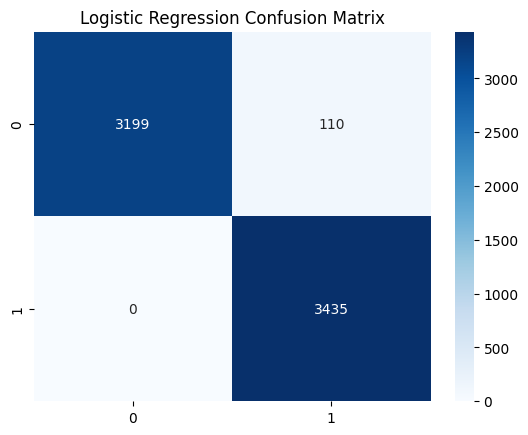

In [ ]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

lr = LogisticRegressionScratch(lr=0.1, epochs=500)
lr.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

evaluate_model(nb, X_test, y_test, "Naive Bayes")
evaluate_model(lr, X_test, y_test, "Logistic Regression")


In [ ]:
from sklearn.model_selection import StratifiedKFold

def cross_val_score_custom(model_class, X, y, folds=5, **kwargs):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in skf.split(X, y):
        model = model_class(**kwargs)
        model.fit(X[train_idx], y[train_idx])
        scores.append(model.score(X[val_idx], y[val_idx]))
    return np.mean(scores)

print("Naive Bayes CV Accuracy:", cross_val_score_custom(NaiveBayes, X, y))
print("Logistic Regression CV Accuracy:", cross_val_score_custom(LogisticRegressionScratch, X, y, lr=0.1, epochs=500))


Naive Bayes CV Accuracy: 0.9814627365420385
Logistic Regression CV Accuracy: 0.9834202694099183


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_curves(model, X_test, y_test, name="Model"):
    probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    precision, recall, _ = precision_recall_curve(y_test, probs)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.3f}")
    plt.plot([0,1],[0,1],'--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(recall, precision)
    plt.title(f"PR Curve - {name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()


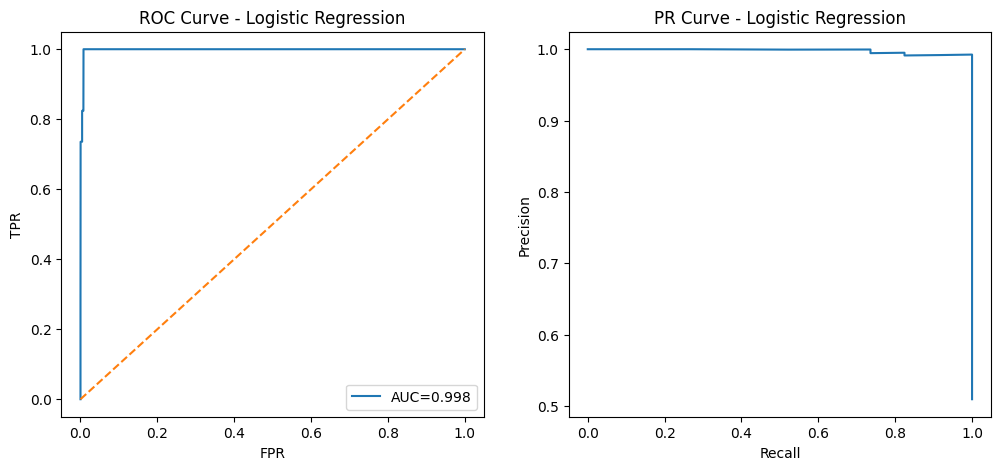

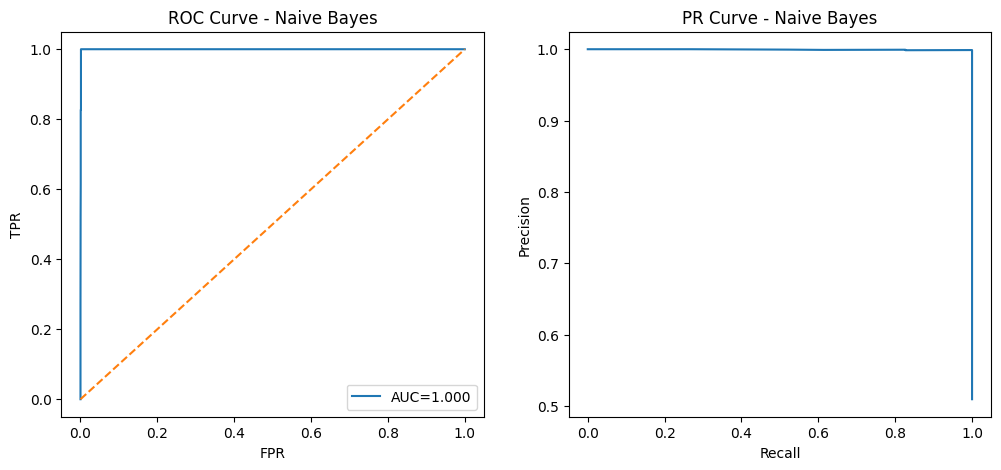

In [ ]:
plot_curves(lr, X_test, y_test, "Logistic Regression")
plot_curves(nb, X_test, y_test, "Naive Bayes")


In [ ]:
# ----- Voting Ensemble -----
class VotingEnsemble:
    def __init__(self, models, voting="hard"):
        """
        models : list of (name, model) tuples
        voting : "hard" for majority voting, "soft" for averaging probabilities
        """
        self.models = dict(models)
        self.voting = voting

    def fit(self, X, y):
        for name, model in self.models.items():
            model.fit(X, y)

    def predict_proba(self, X):
        probas = [model.predict_proba(X) for model in self.models.values()]
        avg_proba = np.mean(probas, axis=0)  # average across models
        return avg_proba

    def predict(self, X):
        if self.voting == "soft":
            return np.argmax(self.predict_proba(X), axis=1)
        else:  # hard voting
            preds = np.array([model.predict(X) for model in self.models.values()])
            maj_vote = np.round(preds.mean(axis=0))
            return maj_vote.astype(int)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))



In [ ]:
class StackingEnsemble:
    def __init__(self, base_models, meta_model):
        """
        base_models : list of (name, model) tuples
        meta_model  : meta-classifier (must implement fit, predict, predict_proba)
        """
        self.base_models = dict(base_models)
        self.meta_model = meta_model

    def fit(self, X, y):
        # Fit base models
        for name, model in self.base_models.items():
            model.fit(X, y)

        # Build meta features (using class-1 probabilities from base models)
        base_probas = [model.predict_proba(X)[:, 1] for model in self.base_models.values()]
        meta_X = np.vstack(base_probas).T

        # Train meta-model
        self.meta_model.fit(meta_X, y)

    def predict_proba(self, X):
        base_probas = [model.predict_proba(X)[:, 1] for model in self.base_models.values()]
        meta_X = np.vstack(base_probas).T
        return self.meta_model.predict_proba(meta_X)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))



Voting Ensemble (Soft) Results:
Accuracy : 0.9844306049822064
Precision: 0.9703389830508474
Recall   : 1.0
F1 Score : 0.9849462365591398


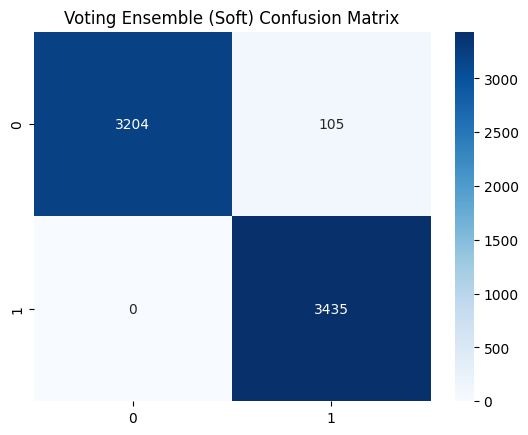


Stacking Ensemble Results:
Accuracy : 0.9838374851720048
Precision: 0.9692437923250564
Recall   : 1.0
F1 Score : 0.9843817165783063


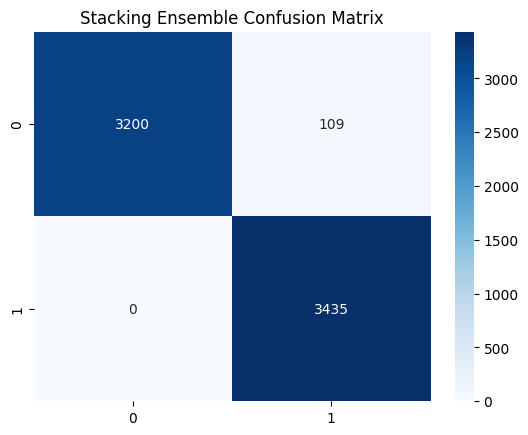

In [ ]:
# Baseline models
nb = NaiveBayes()
lr = LogisticRegressionScratch(lr=0.1, epochs=500)

# Voting Ensemble (soft)
voting = VotingEnsemble(models=[("Naive Bayes", nb), ("Logistic Regression", lr)], voting="soft")
voting.fit(X_train, y_train)
evaluate_model(voting, X_test, y_test, "Voting Ensemble (Soft)")

# Stacking Ensemble
meta_lr = LogisticRegressionScratch(lr=0.1, epochs=500)
stacking = StackingEnsemble(base_models=[("Naive Bayes", nb), ("Logistic Regression", lr)], meta_model=meta_lr)
stacking.fit(X_train, y_train)
evaluate_model(stacking, X_test, y_test, "Stacking Ensemble")


In [ ]:
from sklearn.tree import DecisionTreeClassifier
meta_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
stacking = StackingEnsemble(base_models=[("Naive Bayes", nb), ("Logistic Regression", lr)], meta_model=meta_dt)